In [10]:
# @title import
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
import matplotlib as mpl
import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import Latex

import gcsfs
from dfply import *
from IPython.core.display import display, HTML
from IPython.display import Image as jp_image # mnist도 image라서 이름 바꿈
display(HTML("<style>.container { width:85% !important; }</style>"))

import os
import sys
import pickle

In [11]:
print(os.getcwd())

D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic


In [12]:
#mac
# path = "/Volumes/GoogleDrive/공유 드라이브/Predictive Marketing/Team/개인/항민/deep_learning_from_the_basic/other/deep_learning_images/"
#windows
path = "D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic\other\deep_learning_images/"

In [13]:
print(path)

D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic\other\deep_learning_images/


In [14]:
# def fig(img_name, img_type = ".png", w = 200, h = 200):
#   img_name = str(img_name)+str(img_type)
#   return Image(path+img_name, width = w, height = h)

In [15]:
def fig(img_name, img_type = ".png", w = 200, h = 200):
  img_name = str(img_name)+str(img_type)
  return jp_image(path+img_name, width = w, height = h)

# Ch.3. 신경망

## 퍼셉트론에서 신경망으로

### 신경망의 예

신경망의 예 - 층은 세 개인데, 실제로 가중치를 갖는 층은 1) 입력층, 2) 은닉층 2개라서 '2층 신경망'이라고 칭함. 


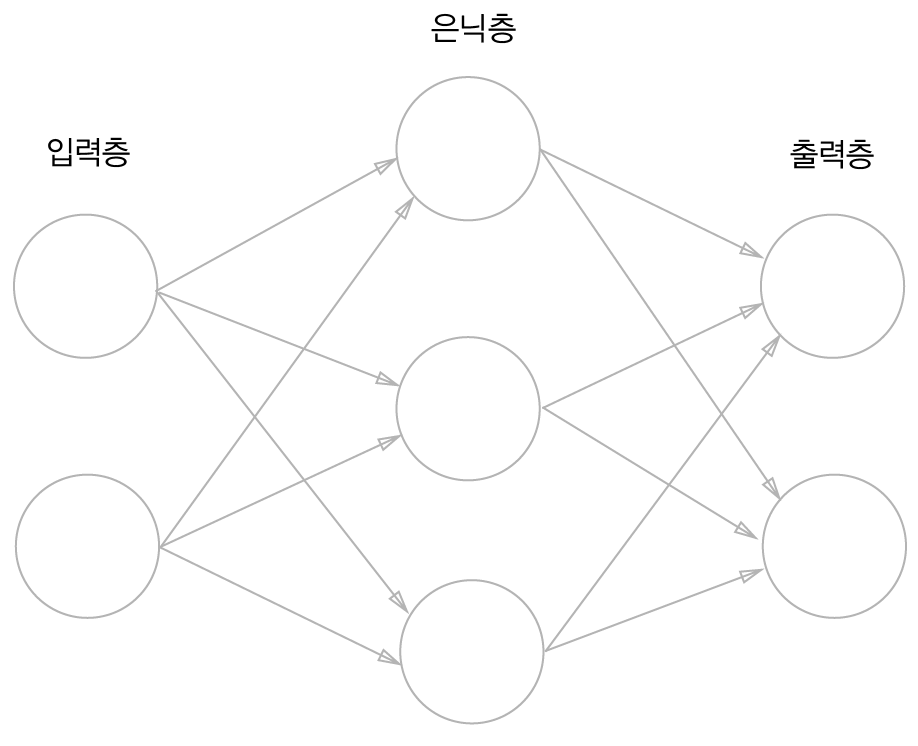

In [16]:
print("신경망의 예 - 층은 세 개인데, 실제로 가중치를 갖는 층은 1) 입력층, 2) 은닉층 2개라서 '2층 신경망'이라고 칭함. ")
fig("fig 3-1", w = 350)

### 퍼셉트론 복습

x1, x2 두 신호를 입력받아 y를 출력하는 퍼셉트론


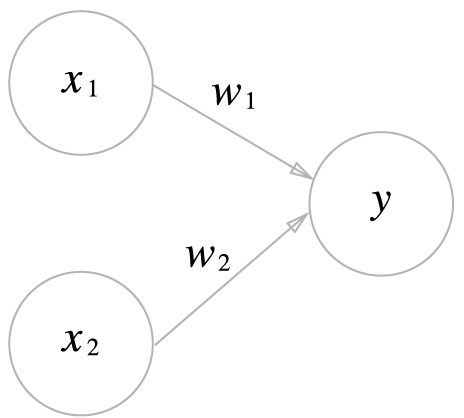

In [17]:
print("x1, x2 두 신호를 입력받아 y를 출력하는 퍼셉트론")
fig("fig 3-2", w = 300)

theta를 -b로 치환한 수식으로 나타내면 아래와 같이 변형 - 그러나 위 퍼셉트론에 편향 b는 나타나있지 않음


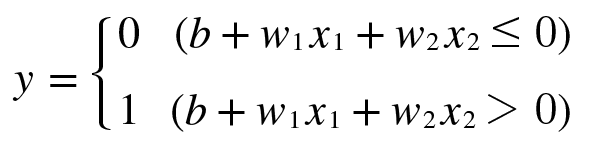

In [18]:
print("theta를 -b로 치환한 수식으로 나타내면 아래와 같이 변형 - 그러나 위 퍼셉트론에 편향 b는 나타나있지 않음")
fig("e 3.1", w = 300)

퍼셉트론에 편향을 명시할 경우 퍼셉트론의 형태


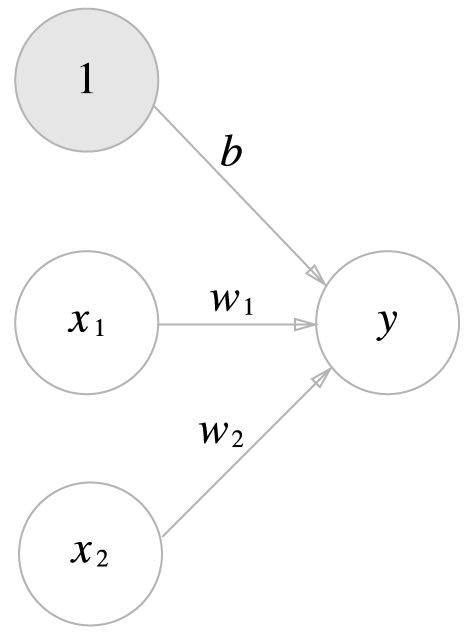

In [19]:
print("퍼셉트론에 편향을 명시할 경우 퍼셉트론의 형태")
fig("fig 3-3", w = 300)

In [20]:
print("fig 3-3에서 가중치가 b이고 입력이 1인 뉴런이 추가됨\n"
      "x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달 됨. 계산값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력함")

fig 3-3에서 가중치가 b이고 입력이 1인 뉴런이 추가됨
x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달 됨. 계산값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력함


위 퍼셉트론의 동작을 함수 h(x)로 표현할 경우


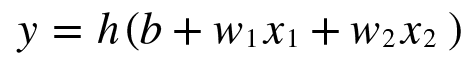

In [21]:
print("위 퍼셉트론의 동작을 함수 h(x)로 표현할 경우")
fig("e 3.2", w = 300)

그 결과값의 출력여부 - 결국 3.1, 3.2, 3.3 모두 하는 일은 같다


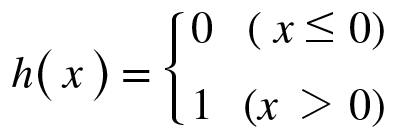

In [22]:
print("그 결과값의 출력여부 - 결국 3.1, 3.2, 3.3 모두 하는 일은 같다")
fig("e 3.3")

### 활성화 함수의 등장

위 식 3.2, 3.3에서 정의한 함수 h(x)가 입력 신호의 총합을 출력 신호로 변환하는 활성화 함수 
이 식은 가중치와 편향이 반영된 입력 신호의 총합을 계산하는 a와


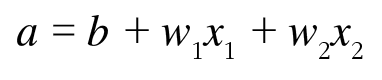

In [23]:
print("위 식 3.2, 3.3에서 정의한 함수 h(x)가 입력 신호의 총합을 출력 신호로 변환하는 활성화 함수 \n"
     "이 식은 가중치와 편향이 반영된 입력 신호의 총합을 계산하는 a와")
fig("e 3.4", w = 300)

입력신호의 총합을 출력 신호로 변환하는 활성화 함수 y로 나눠서 표현할 수 있음


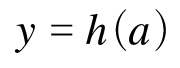

In [24]:
print("입력신호의 총합을 출력 신호로 변환하는 활성화 함수 y로 나눠서 표현할 수 있음")
fig("e 3.5", w = 300)

식 3.4, 3.5를 그림으로 나타내면 아래와 같다.


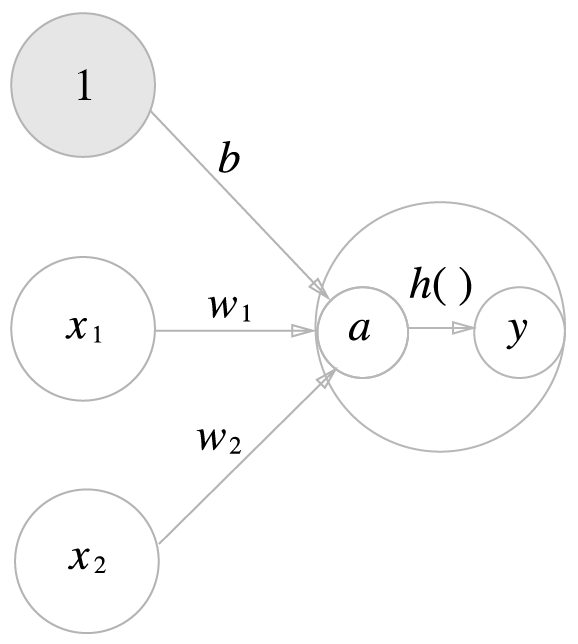

In [25]:
print("식 3.4, 3.5를 그림으로 나타내면 아래와 같다.")
fig("fig 3-4", w = 300)

In [26]:
print("그간 봤던 퍼셉트론과 구조는 동일하나, 활성화 함수 처리 과정이 명시적으로 표현됨\n"
     "->h(x)가 정한 기준을 만족하면 y에 신호를 전달하는 것\n"
     "h(x)를 신경망에 표현하지 않는 경우도 있음 - 표현하게 되면 위 3.4그림처럼 되는 것이고, 아니라면 칸이 비어있을 것임")

그간 봤던 퍼셉트론과 구조는 동일하나, 활성화 함수 처리 과정이 명시적으로 표현됨
->h(x)가 정한 기준을 만족하면 y에 신호를 전달하는 것
h(x)를 신경망에 표현하지 않는 경우도 있음 - 표현하게 되면 위 3.4그림처럼 되는 것이고, 아니라면 칸이 비어있을 것임


## 활성화 함수

In [27]:
print("식 3.3과 같은 활성화 함수는 임계값을 경계로 출력이 바뀜 - > 퍼셉트론에서 이런 함수를 계단 함수(step func)라 하는데,\n"
      "계단 함수 이외의 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠")

식 3.3과 같은 활성화 함수는 임계값을 경계로 출력이 바뀜 - > 퍼셉트론에서 이런 함수를 계단 함수(step func)라 하는데,
계단 함수 이외의 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠


### 시그모이드 함수

In [28]:
print("시그모이드 함수의 식은 아래와 같고, \n"
     "활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 변환된 신호를 다음 뉴런에 전달함")

시그모이드 함수의 식은 아래와 같고, 
활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 변환된 신호를 다음 뉴런에 전달함


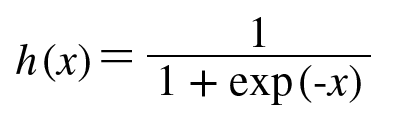

In [29]:
fig("e 3.6", w = 300)

$ exp(-x) = e^{-x} $

$ e = 자연상수 $

In [30]:
print("시그모이드 함수 예시")
print("x = 1일 때, h(1) = " +str(1 / (1+np.exp(-1))))
print("x = 2일 때, h(2) = " +str(1 / (1+np.exp(-2))))
print("x = 3일 때, h(3) = " +str(1 / (1+np.exp(-3))))
print("x = 100일 때, h(100) = " +str(1 / (1+np.exp(-100))))

시그모이드 함수 예시
x = 1일 때, h(1) = 0.7310585786300049
x = 2일 때, h(2) = 0.8807970779778823
x = 3일 때, h(3) = 0.9525741268224334
x = 100일 때, h(100) = 1.0


In [31]:
x = []
for i in range(0, 50):
    s = 1 / (1+np.exp(-i))
    if s < 1.0:
        x.append(s)
    else :
        break
# print(pd.DataFrame(x))
print(i)
print("x = 37, h(37) = " +str(1 / (1+np.exp(-37))))

37
x = 37, h(37) = 1.0


### 계단 함수 구현하기

In [32]:
print("계단 함수는 전달받은 입력값의 합계가 0을 넘으면 1을 출력하고, 그렇지 않으면 0을 출력하는 함수인데, \n"
     "변수로는 입력이 가능하나 np array 형태로 입력은 불가함")
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

계단 함수는 전달받은 입력값의 합계가 0을 넘으면 1을 출력하고, 그렇지 않으면 0을 출력하는 함수인데, 
변수로는 입력이 가능하나 np array 형태로 입력은 불가함


In [33]:
print(step_function(0.0))
print(step_function(np.array([0.0, 1.0])))

0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [34]:
print("따라서 np array를 사용할 수 있도록 코드를 수정하면")
def step_function(x):
    y = x > 0
    return y.astype(np.int)

따라서 np array를 사용할 수 있도록 코드를 수정하면


In [35]:
y = np.array([3.1, 3.3])
y.astype(np.int)

array([3, 3])

In [36]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

In [37]:
print("정상적으로 np array를 계단함수에 사용할 수 있다.")
print(step_function(x))

정상적으로 np array를 계단함수에 사용할 수 있다.
[0 1 1]


### 계단 함수의 그래프

가중치와 편향이 반영된 계산값에 따른 h(x)의 출력 여부


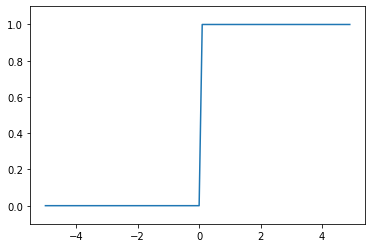

In [38]:
print("가중치와 편향이 반영된 계산값에 따른 h(x)의 출력 여부")
def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0 ~ 5.0 까지 0.1 단위로 np array 생성
y = step_function(x) # 해당 x의 원소로 만들어진 값이 0보다 크면 1, 아니면 0
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

### 시그모이드 함수 구현하기

In [39]:
print("x가 np array더라도 별 처리 없이 계산됨 - 브로드 캐스트 때문(np자체가 넘파이 배열이랑 스칼라 값을 각각의 연산으로 바꿔 수행해주기 때문)")
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

s = np.array([-1.0, 1.0, 2.0])

sigmoid(s)

x가 np array더라도 별 처리 없이 계산됨 - 브로드 캐스트 때문(np자체가 넘파이 배열이랑 스칼라 값을 각각의 연산으로 바꿔 수행해주기 때문)


array([0.26894142, 0.73105858, 0.88079708])

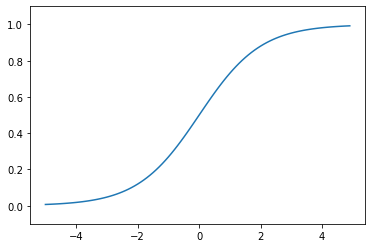

In [40]:
xs = np.arange(-5.0, 5.0, 0.1)
ys = sigmoid(xs)
plt.plot(xs, ys)
plt.ylim(-0.1, 1.1)
plt.show()

In [41]:
print("브로드캐스트?")
t = np.array([1.0, 2.0, 3.0])
print(t+1) #1.0이라는 스칼라 값과 array인 t의 연산이 가능 = 브로드 캐스트
print(1.0/t) #1.0이라는 스칼라 값과 array인 t의 연산이 가능 = 브로드 캐스트

브로드캐스트?
[2. 3. 4.]
[1.         0.5        0.33333333]


### 계단 함수와 시그모이드 함수 비교

계단함수와 시그모이드 함수


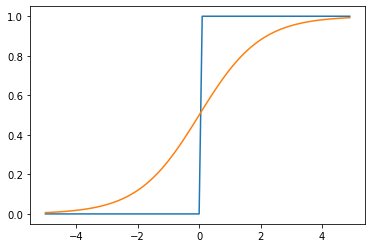

In [42]:
print("계단함수와 시그모이드 함수")
plt.plot(x, y)
plt.plot(xs, ys)

In [43]:
print("차이: \n"
    "0을 기점으로 바로 1을 출력하느냐, 연속된 값을 출력하느냐\n"
     "-> 퍼셉트론에서는(계단함수) 층과 층 사이에 0 or 1만 존재했다면\n"
     "신경망에서는 연속된 실수가 존재한다.")

차이: 
0을 기점으로 바로 1을 출력하느냐, 연속된 값을 출력하느냐
-> 퍼셉트론에서는(계단함수) 층과 층 사이에 0 or 1만 존재했다면
신경망에서는 연속된 실수가 존재한다.


In [44]:
print("공통점: \n"
      "입력이 아무리 커도, 아무리 작아도 출력은 0에서 1 사이\n"
     "둘 다 비선형 함수(직선이 아니라는 의미)")

공통점: 
입력이 아무리 커도, 아무리 작아도 출력은 0에서 1 사이
둘 다 비선형 함수(직선이 아니라는 의미)


In [45]:
print("신경망에서는 선형함수를 사용하면 안됨. 선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문\n"
     "활성화함수 h(x) = cx를 3개의 층으로 반복사용한 3층 네트워크를 예로 들어보면,\n"
     "y(x) = h(h(h(x)))가 되고, y(x) = c * c * c * x이며, y = ax형태로 나타내면 y = c^3x가 됨 - > SQL로 치면 동일한 필터를 세 번 사용한 것, 즉 선형")

신경망에서는 선형함수를 사용하면 안됨. 선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문
활성화함수 h(x) = cx를 3개의 층으로 반복사용한 3층 네트워크를 예로 들어보면,
y(x) = h(h(h(x)))가 되고, y(x) = c * c * c * x이며, y = ax형태로 나타내면 y = c^3x가 됨 - > SQL로 치면 동일한 필터를 세 번 사용한 것, 즉 선형


In [46]:
#선형이라 함은 f(x) = ax + b 처럼 입력된 값의 상수배만큼 변하는 함수를 선형함수라 표현함
#비선형은 직선 1개로 그릴 수 없는 함수ㅇ

### ReLU 함수

ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하이면 0을 출력하는 함수


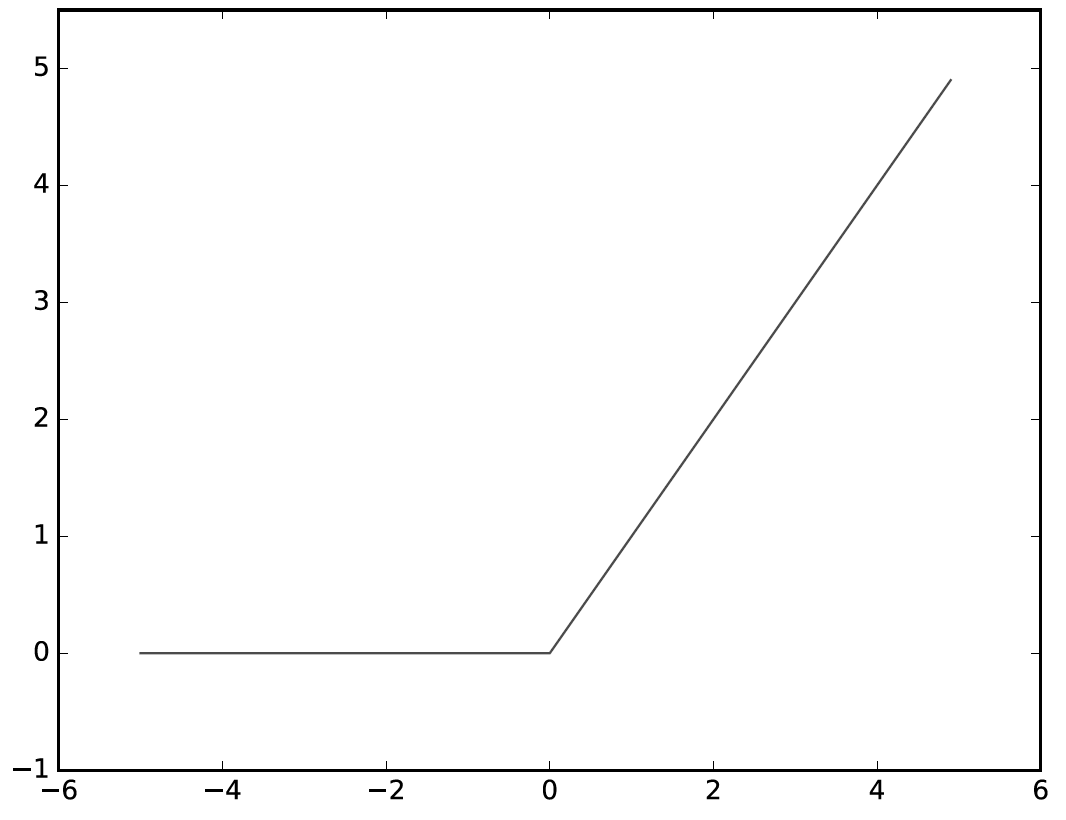

In [47]:
print("ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하이면 0을 출력하는 함수")
fig("fig 3-9", w = 500)

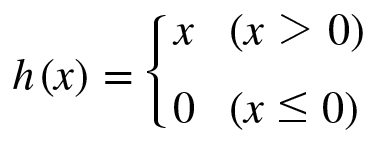

In [48]:
fig("e 3.7", w = 300)

In [49]:
def relu(x):
  return np.maximum(0, x) #전체 행의 각각의 열 내에서 가장 큰 값 -> 0을 넘으면 그 값을, 0이면 0을

In [50]:
np.maximum?

In [51]:
np.maximum(0, 5)

5

In [52]:
# # x = np.array([[1,2,3]])
# x_np_arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
# x_arr = ([1,2,3], [4,5,6])
# print(x_np_arr)
# print(x_arr)
# # pd.DataFrame(x)

In [53]:
# relu(x_np_arr)
# relu(x_arr)

## 다차원 배열의 계산

In [54]:
### 다차원 배열

In [55]:
print("다차원 배열도 결론적으로 '숫자의 집합'. 숫자가 1차원으로 길게 늘어져있다, 직사각형이다, 3차원 배열이다 하는 것 보두 다차원 배열이라 표현함")

다차원 배열도 결론적으로 '숫자의 집합'. 숫자가 1차원으로 길게 늘어져있다, 직사각형이다, 3차원 배열이다 하는 것 보두 다차원 배열이라 표현함


In [56]:
A = np.array([1, 2, 3, 4])
print("A는 1차원 배열 ")
print(A)
print(A.shape) # A.shape는 튜플을 반환함
print(A.shape[0]) # 1차원이기 때문에 인덱스를 주면 shape는 4가 나옴(4,0) shape의 1번째니깐

A는 1차원 배열 
[1 2 3 4]
(4,)
4


In [57]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print("B는 1차원 배열 ")
print("B의 구성: "+str(B))
print("B의 차원: "+str(np.ndim(B)))
print(("B의 shape: "+str(B.shape))) # A.shape는 튜플을 반환함
print(B.shape[0]) # (3,2) shape의 0번째니깐 3
pd.DataFrame(B)

B는 1차원 배열 
B의 구성: [[1 2]
 [3 4]
 [5 6]]
B의 차원: 2
B의 shape: (3, 2)
3


,0,1
0,1,2
1,3,4
2,5,6


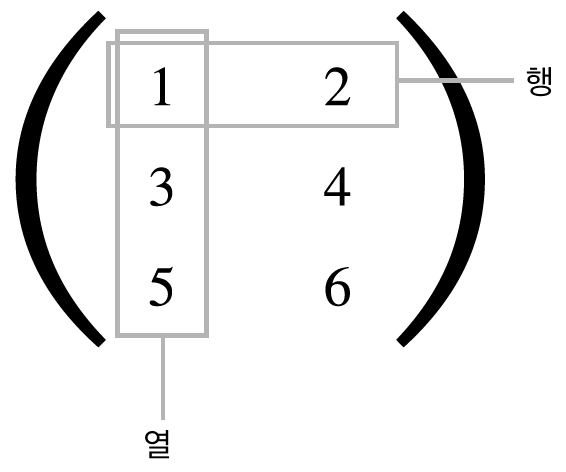

In [58]:
fig("fig 3-10", w = 300)
#e 2.1 그림에서 theta를 -b로 치환 후 좌변으로 옮긴 것

### 행렬의 곱

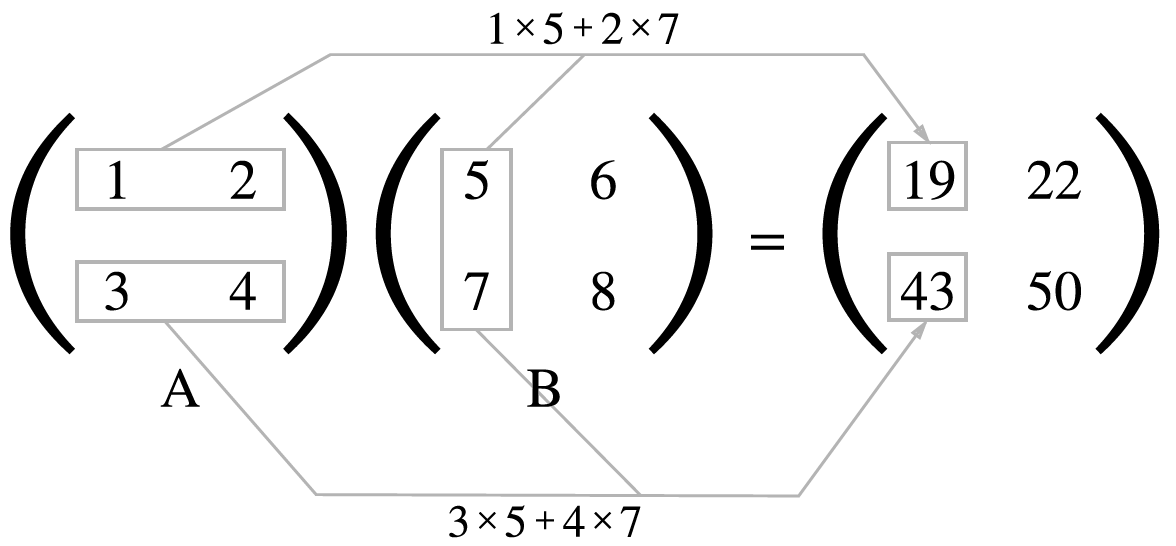

In [59]:
fig("fig 3-11", w = 400)

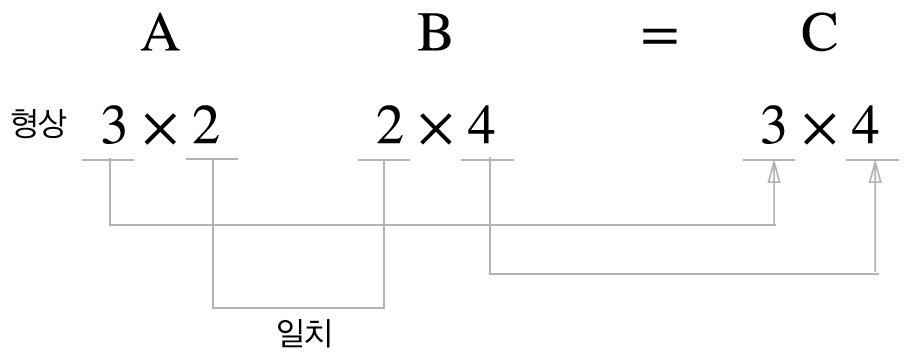

In [60]:
fig("fig 3-12", w = 400)

In [61]:
#2차원 array간의 행렬곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("A.shape: " +str(A.shape))
print("B.shape: " +str(B.shape))

print("A dot B: " +str(np.dot(A, B)))
print("A * B : " +str(A * B))
#dot = 행렬의 곱
# A * B = 스칼라간의 곱(대응되는 애들 끼리)

A.shape: (2, 2)
B.shape: (2, 2)
A dot B: [[19 22]
 [43 50]]
A * B : [[ 5 12]
 [21 32]]


In [62]:
#1차원 array간의 행렬곱 - 1차원에서의 행렬곱은 스칼라값(대응곱의 합계)을 반환한다. 
A = np.array([1, 2, 3, 4])
B = np.array([5, 6, 7, 8])

print("A dot B: " +str(np.dot(A, B)))
print("A * B: " +str(A * B))

A dot B: 70
A * B: [ 5 12 21 32]


In [63]:
# (m * k)행렬 * (k * n)행렬 
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2],[3, 4], [5, 6]])
print("A dot B: " +str(np.dot(A, B)))
A*B
#행렬곱은 가능하나 스칼라곱은 불가하다.
#ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

A dot B: [[22 28]
 [49 64]]


ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [64]:
# (m * k)행렬 * k행렬 = 2차원이상 행렬 * 1차원 행렬
A = np.array([[1, 2], [3, 4], [5,6]])
B = np.array([7,8])
print("A dot B: " +str(np.dot(A, B)))
print("A dot B shape: " +str(np.dot(A, B).shape) + " -> shape를 3, 1이 아니라 (3, )으로 뱉어준다")
print("A * B: " +str(A * B))

A dot B: [23 53 83]
A dot B shape: (3,) -> shape를 3, 1이 아니라 (3, )으로 뱉어준다
A * B: [[ 7 16]
 [21 32]
 [35 48]]


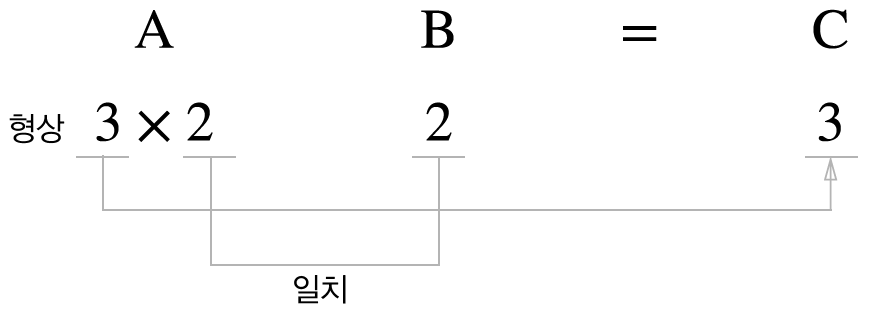

In [65]:
fig("fig 3-13", w = 400)

## 신경망에서의 행렬 곱

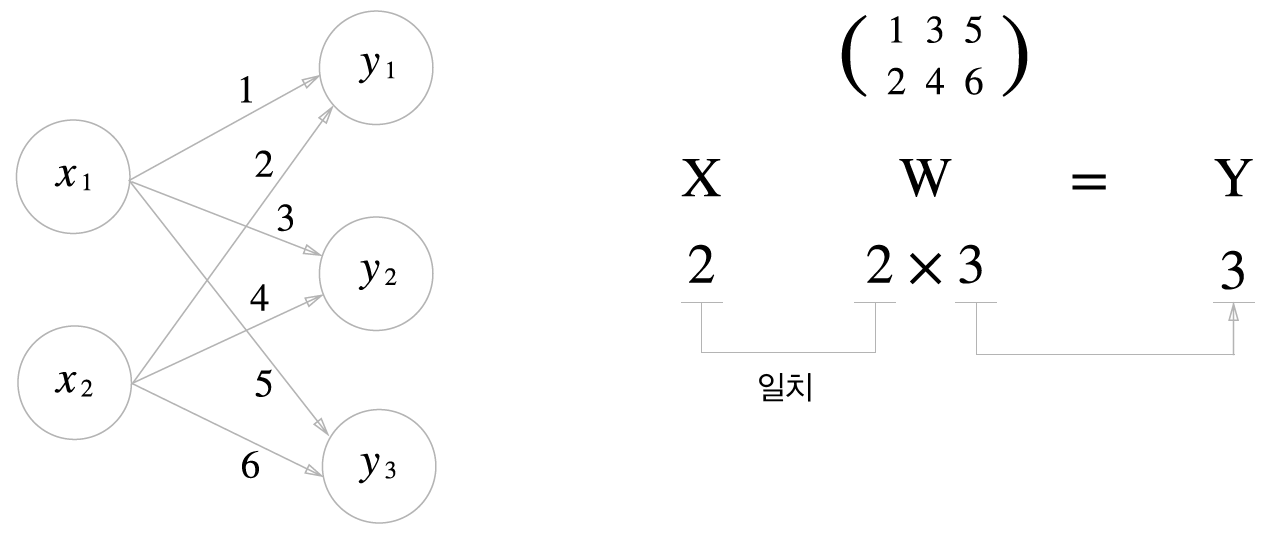

In [66]:
fig("fig 3-14", w = 500)

In [67]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(X.shape)
print(W.shape)
print(Y)
print(Y.shape)
print(X * W)

(2,)
(2, 3)
[ 5 11 17]
(3,)


ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

## 3층 신경망 구현하기

2개의 입력층, 3개의 1차 은닉층, 2개의 2차 은닉층, 2개의 출력층


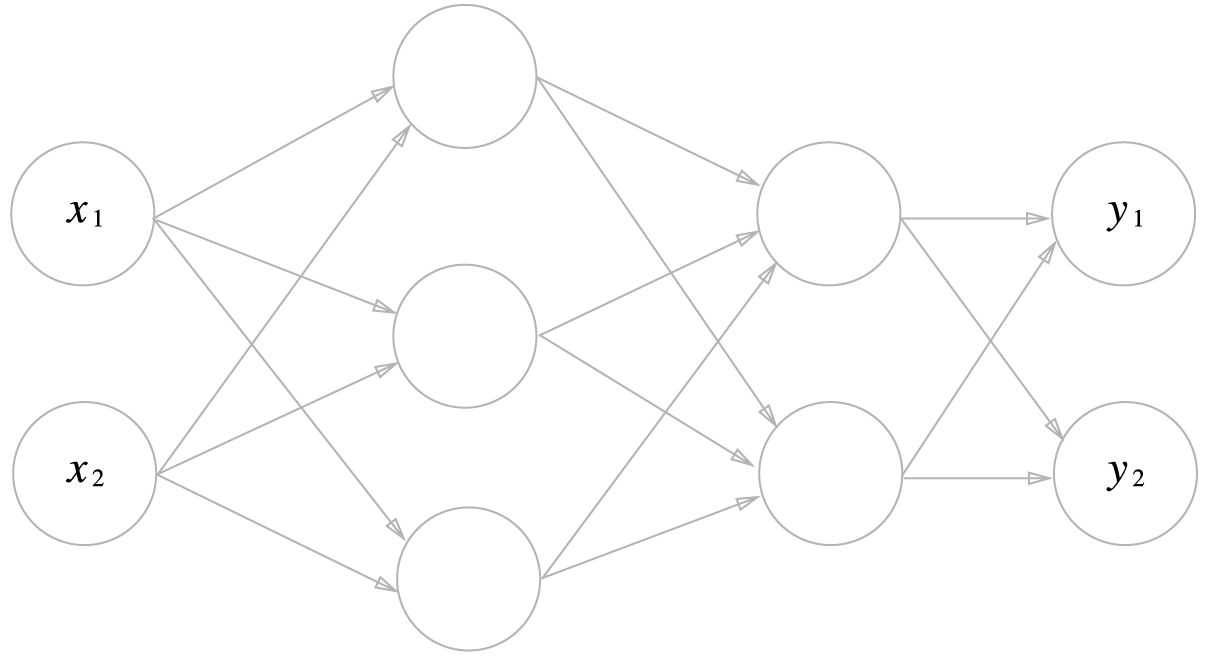

In [68]:
print("2개의 입력층, 3개의 1차 은닉층, 2개의 2차 은닉층, 2개의 출력층")
fig("fig 3-15", w = 500)

표기법


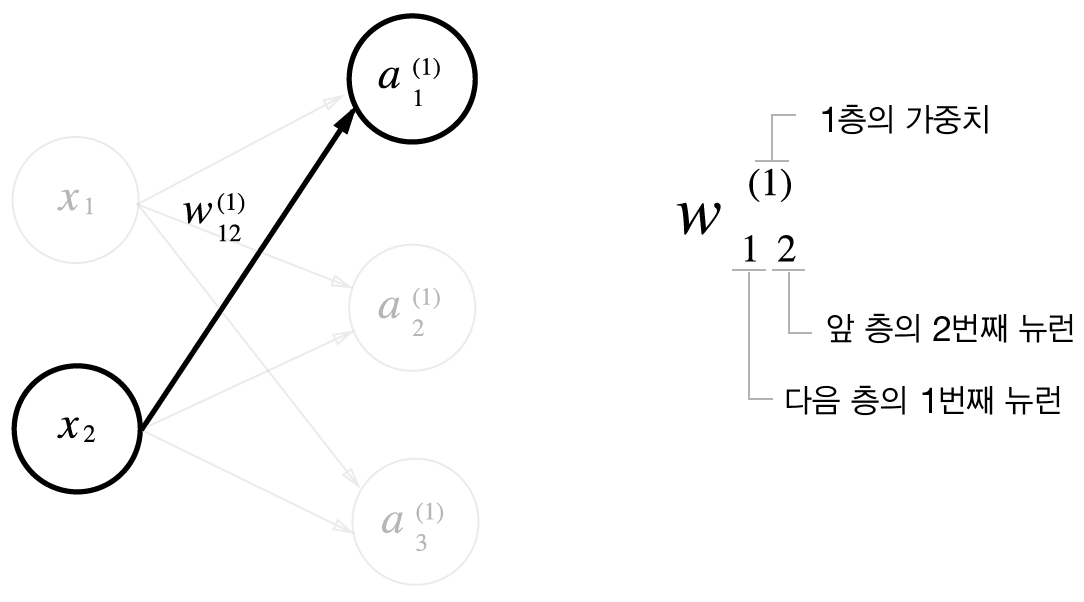

In [69]:
print("표기법")
fig("fig 3-16", w = 500)

### 표기법 예시
$W^{(1)}_{1 2}$ : 앞 층의 2번째 뉴런(x$_2$)에서 다음 층의 1번째 뉴런(a$^{(1)}_{1}$)으로 향하는 1층의 가중치라는 뜻이며,
가중치 오른쪽 아래의 인덱스 번호는 '다음 층 뉴런의 번호, 앞 층 뉴런의 번호' 순으로 적는다.

### 각 층의 신호 전달 구현하기

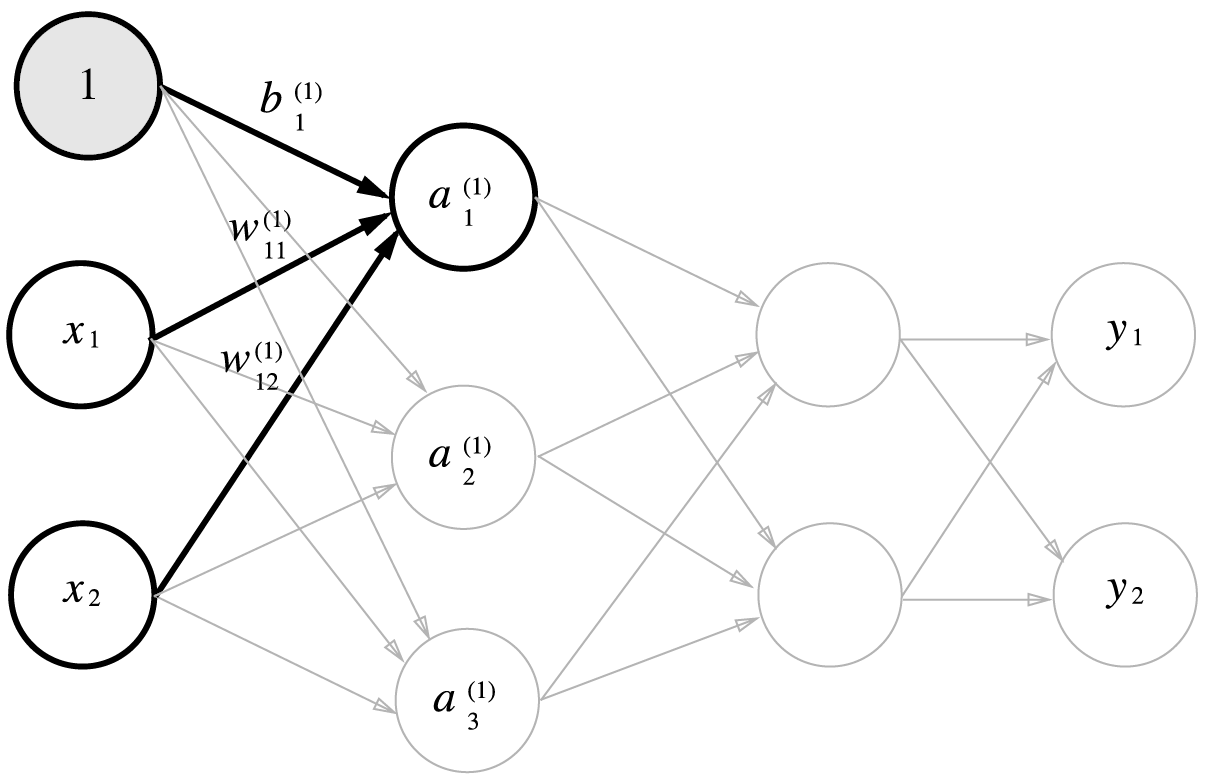

In [70]:
fig("fig 3-17", w = 500)

In [71]:
Latex("$s_5$")

<IPython.core.display.Latex object>

In [72]:
Latex("$a^{(1)}_{1 2}$")

<IPython.core.display.Latex object>

In [73]:
print("* 편향 뉴런이 추가되었고, 편향 뉴런은 상수이기 때문에 자신이 속한 층의 위치(1)과 다음 층의 어디로 가는지만 표기됨")
print("첫 번째 은닉층의 첫 번째 뉴런인 ")
Latex("$a^{(1)}_{1 2}$은 가중치를 곱한 신호 두 개와 편향을 합해서 다음과 같이 계산함")

* 편향 뉴런이 추가되었고, 편향 뉴런은 상수이기 때문에 자신이 속한 층의 위치(1)과 다음 층의 어디로 가는지만 표기됨
첫 번째 은닉층의 첫 번째 뉴런인 


<IPython.core.display.Latex object>

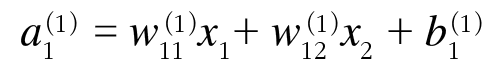

In [74]:
fig("e 3.8", w = 400)

행렬의 곱을 이용하면 이를 좀 더 간단하게 표현할 수 있음


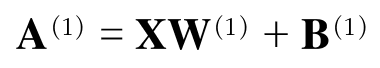

In [75]:
print("행렬의 곱을 이용하면 이를 좀 더 간단하게 표현할 수 있음")
fig("e 3.9", w = 400)

In [76]:
print("이 때 각 행렬은 아래와 같다")

이 때 각 행렬은 아래와 같다


$A^{(1)} = ( a^{(1)}_{1 }, a^{(1)}_{2 }, a^{(1)}_{3 })$

$X = (x_1, x_2)$

$B^{(1)} = ( b^{(1)}_{1 }, b^{(1)}_{2 }, b^{(1)}_{3 })$

$W^{(1)} = \begin{pmatrix} w^{(1)}_{11} & a^{(1)}_{21} & a^{(1)}_{31}
\\ w^{(1)}_{12} & a^{(1)}_{22} & a^{(1)}_{32} \end{pmatrix}$

In [77]:
print("다차원 array를 활용하여 식 3.9를 구현")

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)
A1 = np.dot(X, W1) + B1

다차원 array를 활용하여 식 3.9를 구현
(2, 3)
(2,)
(3,)


1층의 활성화 함수 처리과정 살펴보기
입력층에서 1층으로의 신호전달 과정을 보여준다.
은닉층에서 가중치의 합을 a로 표기하고, 활성화 함수 h()로 변환된 신호를 z로 표기한다.


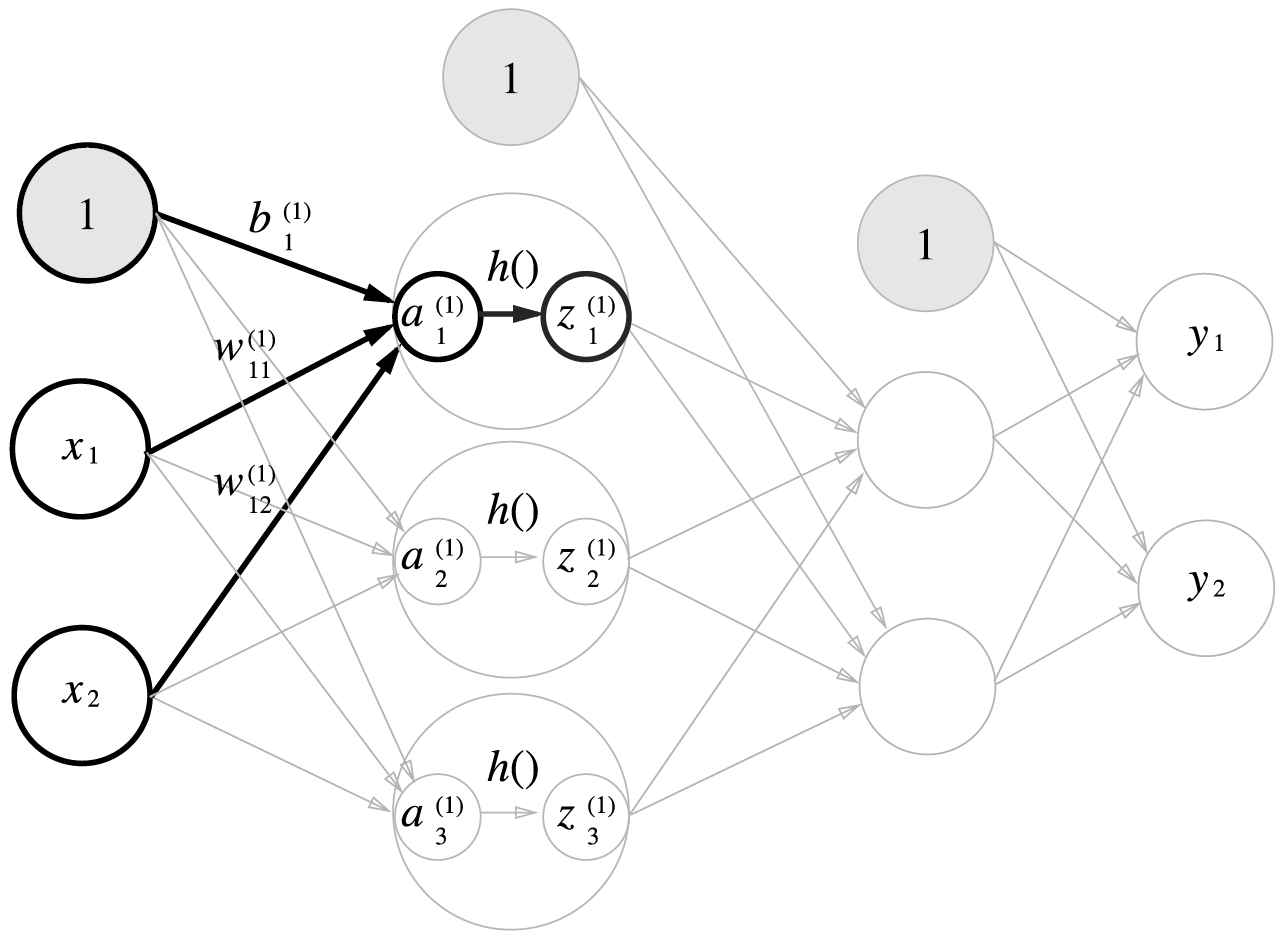

In [78]:
print("1층의 활성화 함수 처리과정 살펴보기")
print("입력층에서 1층으로의 신호전달 과정을 보여준다.")
print("은닉층에서 가중치의 합을 a로 표기하고, 활성화 함수 h()로 변환된 신호를 z로 표기한다.")
fig("fig 3-18", w = 500)

In [79]:
print("h(a)로 simoid함수를 사용할 경우")
Z1 = sigmoid(A1)
print("A1: " +str(A1))
print("sigmoid(A1) = Z1: " + str(Z1))

h(a)로 simoid함수를 사용할 경우
A1: [0.3 0.7 1.1]
sigmoid(A1) = Z1: [0.57444252 0.66818777 0.75026011]


1층(첫 번째 은닉층)에서 2층으로(2 번째은닉층) 가는 활성화 함수 처리과정 살펴보기
1층에서 2층으로의 신호전달 과정을 보여준다.
1층 가중치의 합을 a로 표기하고, 활성화 함수 h()로 변환된 신호를 z로 표기한다.


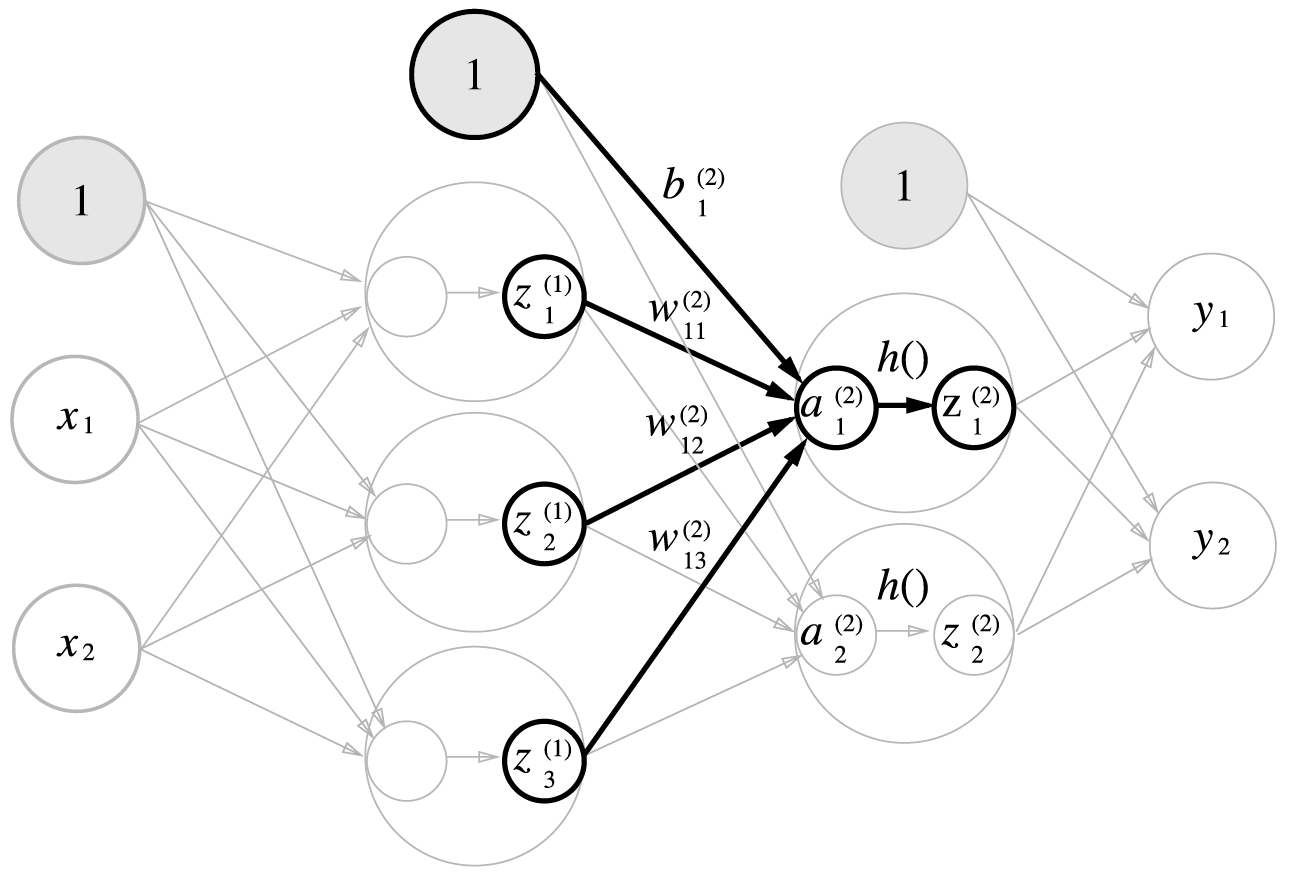

In [80]:
print("1층(첫 번째 은닉층)에서 2층으로(2 번째은닉층) 가는 활성화 함수 처리과정 살펴보기")
print("1층에서 2층으로의 신호전달 과정을 보여준다.")
print("1층 가중치의 합을 a로 표기하고, 활성화 함수 h()로 변환된 신호를 z로 표기한다.")
fig("fig 3-19", w = 500)

In [81]:
print("1층 -> 2층 전달 과정\n -> 1층의 출력 Z1이 2층에 입력된다는 점 외에는 다른 게 없다.")

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(W2.shape)
print(B2.shape)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

1층 -> 2층 전달 과정
 -> 1층의 출력 Z1이 2층에 입력된다는 점 외에는 다른 게 없다.
(3, 2)
(2,)


2층에서 출력층으로 신호 전달
활성화 함수만 h()에서 시그마()로 변함


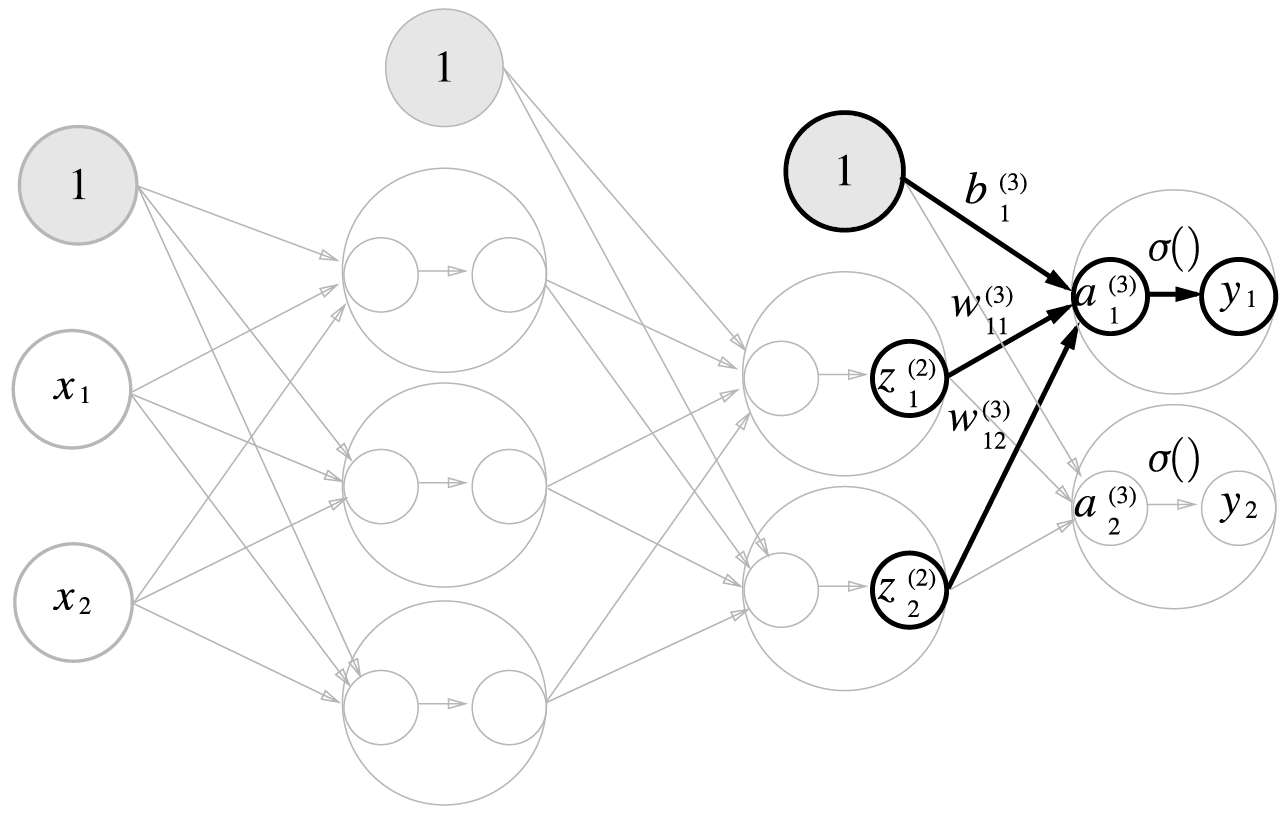

In [82]:
print("2층에서 출력층으로 신호 전달")
print("활성화 함수만 h()에서 시그마()로 변함")
fig("fig 3-20", w = 500)

In [83]:
def identity_function(x):
  return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # OR Y = A3 -> identity_function 자체가 항등함수(f(x) = x)라서 이렇게 해도 됨

In [84]:
print("일반적으로 회귀에는 출력층의 활성화 함수에 항등 함수를,\n이항분류에는 시그모이드 함수를,\n다중 클래스 분류에는 소프트맥수를 사용하는 것이 일반적이다.\n"
     "회귀는 출력값을 그대로 사용해야하는 점\n"
     "이항분류는 1개의 클래스를 기준으로 임계치가 넘는지 안넘는지만 보면 되는 점\n"
     "다중 클래스는 여러 클래스 중 가장 큰 값을 예측값으로 봐야하는 점 때문?")

일반적으로 회귀에는 출력층의 활성화 함수에 항등 함수를,
이항분류에는 시그모이드 함수를,
다중 클래스 분류에는 소프트맥수를 사용하는 것이 일반적이다.
회귀는 출력값을 그대로 사용해야하는 점
이항분류는 1개의 클래스를 기준으로 임계치가 넘는지 안넘는지만 보면 되는 점
다중 클래스는 여러 클래스 중 가장 큰 값을 예측값으로 봐야하는 점 때문?


In [85]:
print("구현 정리 - 신경망 구현 표현의 관례상 가중치만 대문자로, 나머지는 모두 소문자로 작성")

def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1 # 입력층 -> 1차 은닉층 가중치 계산 결괏값
  z1 = sigmoid(a1) # 1차 은닉층 가중치 계산 결괏값에 대한 활성화함수(sigmoid로 적용)
  a2 = np.dot(z1, W2) + b2 # 1차 은닉층 활성화 결괏값(z1)을 사용한 2차 은닉층 가중치 계산 결괏값
  z2 = sigmoid(a2) # 2차 은닉층 가중치 계산 결괏값에 대한 활성화 함수(sigmoid로 적용)
  a3 = np.dot(z2, W3) + b3 # 2차 은닉층 활성화 결괏값(z2)을 사용한 출력층 가중치 계산 결괏값
  y = identity_function(a3) # 출력층 가중치 계산 결괏값에 대한 활성화(항등)함수 
  
  return y # 항등함수이기 때문에 y = a3 출력

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

구현 정리 - 신경망 구현 표현의 관례상 가중치만 대문자로, 나머지는 모두 소문자로 작성
[0.31682708 0.69627909]


In [86]:
print("위 코드에서 init_network 함수는 가중치와 편향을 초기화하고 이들을 dict 변수인 network에 저장 -> network에 각 층에 필요한 매개변수(가중치와 편향)를 저장한다는 의미")
print("foward 함수는 신호가 순방향(입력 -> 출력 방향)으로 전달됨을 알리기 위함")

위 코드에서 init_network 함수는 가중치와 편향을 초기화하고 이들을 dict 변수인 network에 저장 -> network에 각 층에 필요한 매개변수(가중치와 편향)를 저장한다는 의미
foward 함수는 신호가 순방향(입력 -> 출력 방향)으로 전달됨을 알리기 위함


## 출력층 설계하기

In [87]:
print("신경망은 분류, 회귀 모두에 이용할 수 있음. 그러나 앞서 언급한대로 문제의 정의에 따라 출력층 활성화 함수를 다르게 사용해야함")

신경망은 분류, 회귀 모두에 이용할 수 있음. 그러나 앞서 언급한대로 문제의 정의에 따라 출력층 활성화 함수를 다르게 사용해야함


### 항등 함수와 소프트맥스 함수 구현하기

항등함수는 입력을 그대로 출력하는 함수


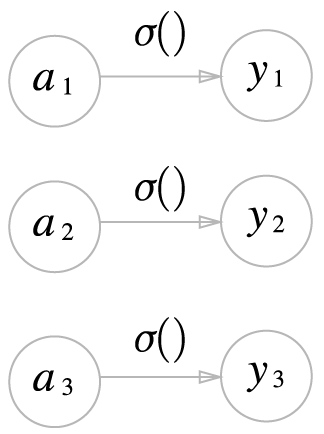

In [88]:
print("항등함수는 입력을 그대로 출력하는 함수")

fig("fig 3-21")

소프트맥스 함수는 최저 출력 0, 최대 출력 1을 갖게 만들어주는 함수
n은 출력층의 뉴런수, y_k는 그 중 k 번째 출력을 의미함


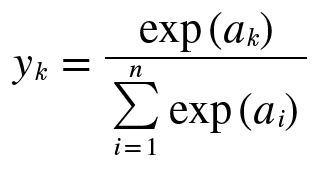

In [89]:
print("소프트맥스 함수는 최저 출력 0, 최대 출력 1을 갖게 만들어주는 함수")
print("n은 출력층의 뉴런수, y_k는 그 중 k 번째 출력을 의미함")
fig("e 3.10")

소프트맥스 함수의 출력은 모든 입력 신호로부터 화살표를 받는다.(출력층의 모든 뉴런이 입력 신호에서 영향을 받는다.)


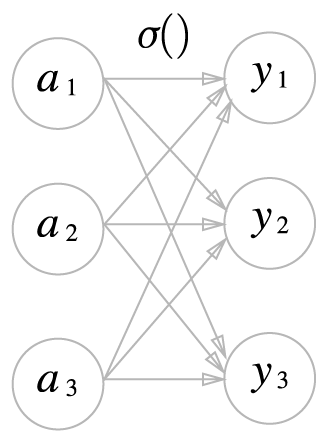

In [90]:
print("소프트맥스 함수의 출력은 모든 입력 신호로부터 화살표를 받는다.(출력층의 모든 뉴런이 입력 신호에서 영향을 받는다.)")
fig("fig 3-22")

In [91]:
a = np.array([0.3, 2.9, 4.0]) #입력
exp_a = np.exp(a) # 수식에 근거 입력값을 모두 지수함수 형태로 변경
print("exp(a): " + str(exp_a))

sum_exp_a = np.sum(exp_a)
print(sum_exp_a) # 수식에 근거 exp_a의 합계 산출

y = exp_a / sum_exp_a

print("출력층의 활성화함수 exp()로 인해 y값은: " + str(y)) #세 출력값의 합계는 1


exp(a): [ 1.34985881 18.17414537 54.59815003]
74.1221542101633
출력층의 활성화함수 exp()로 인해 y값은: [0.01821127 0.24519181 0.73659691]


### 소프트맥스 함수 구현시 주의점

소프트맥스 함수에서 자연로그 e를 사용하는데, e^ak 제곱이 되면 소숫점이 수십개가 되고 이를 연산하면 오버플로우가 발생할 수 있음.
따라서 이를 방지하기 위해 입력신호의 최댓값에 로그를 취한 상수 C를 소프트맥스 함수의 분자, 분모에 더해주어 연산이 될 수 있게 처리함


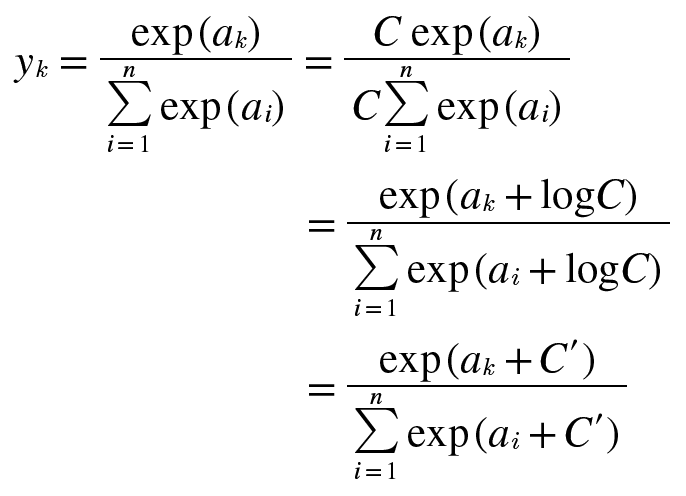

In [92]:
print("소프트맥스 함수에서 자연로그 e를 사용하는데, e^ak 제곱이 되면 소숫점이 수십개가 되고 이를 연산하면 오버플로우가 발생할 수 있음.\n"
      "따라서 이를 방지하기 위해 입력신호의 최댓값에 로그를 취한 상수 C를 소프트맥스 함수의 분자, 분모에 더해주어 연산이 될 수 있게 처리함")
fig("e 3.11", w = 500)

In [93]:
a = np.array([1010, 1000, 990]) #입력신호의 초깃값
np.exp(a) / np.sum(np.exp(a)) # 소프트 함수 계산 -> overflow 오류가 뜨면서 계산이 제대로 되지 않는다.

C:\Users\mrjjo\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\mrjjo\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [94]:
c = np.max(a) #초기 입력값 array에서 최댓값을 c에 할당한다
a - c #그리고 그 최댓값을 모든 원소에서 빼준다.(작은 숫자로 만들어준다는 것이고, 분자 분모 모두에 적용할 것이기 때문에 영향없음)

array([  0, -10, -20])

In [95]:
np.exp(a-c) / np.sum(np.exp(a-c)) # 숫자를 작게 만들어줬기 때문에 연산이 정상적으로 가능하다.

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [96]:
print("이를 바탕으로 소프트맥스 함수 구현 코드를 다시 생성")

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

이를 바탕으로 소프트맥스 함수 구현 코드를 다시 생성


### 소프트맥스 함수의 특징

In [97]:
print("소프트맥스 함수를 사용하면 신경망의 출력은 아래와 같이 계산할 수 있다.\n"
     "최종 출력값 3개의 합이 1이라는 점이 소프트맥스 함수의 중요한 성질이다.\n"
     "합이 1이라는 점이 소프트맥스 함수의 출력값을 일종의 확률로 해석할 수 있기 때문이다.(*개인적으로는 확률보다는 MinMaxScaler와 같은 장치로 이해함)\n"
     "*y = exp(x) 자체가 단조증가(a >= b이면 f(a) >= f(b)가 항상 성립)하기 때문에 스케일링을 해도 대소관계가 변하지는 않음")

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print("상수 C를 고려한 소프트맥스 함수의 출력값 y: " + str(y))
print("출력값 y의 합계: " + str(np.sum(y)))

소프트맥스 함수를 사용하면 신경망의 출력은 아래와 같이 계산할 수 있다.
최종 출력값 3개의 합이 1이라는 점이 소프트맥스 함수의 중요한 성질이다.
합이 1이라는 점이 소프트맥스 함수의 출력값을 일종의 확률로 해석할 수 있기 때문이다.(*개인적으로는 확률보다는 MinMaxScaler와 같은 장치로 이해함)
*y = exp(x) 자체가 단조증가(a >= b이면 f(a) >= f(b)가 항상 성립)하기 때문에 스케일링을 해도 대소관계가 변하지는 않음
상수 C를 고려한 소프트맥스 함수의 출력값 y: [0.01821127 0.24519181 0.73659691]
출력값 y의 합계: 1.0


In [98]:
print("위와 같은 성질 때문에(단조증가) 그리고 리소스 낭비를 방지하고자 일반적으로 추론(실제 분류 단계)에서는 소프트 맥스 함수를 생략한다.\n"
     "그러나 학습 과정에서는 소프트맥스 함수를 사용함.")

위와 같은 성질 때문에(단조증가) 그리고 리소스 낭비를 방지하고자 일반적으로 추론(실제 분류 단계)에서는 소프트 맥스 함수를 생략한다.
그러나 학습 과정에서는 소프트맥스 함수를 사용함.


### 출력층의 뉴런 수 정하기

In [99]:
print("출력층의 뉴런 수는 문제에 따라 적절히 정의 -> 일반적으로 분류하고 싶은 클래스 수로 설정하는 것이 일반적")

출력층의 뉴런 수는 문제에 따라 적절히 정의 -> 일반적으로 분류하고 싶은 클래스 수로 설정하는 것이 일반적


분류해야할 클래스가 10개면 출력층도 10개로 설정함


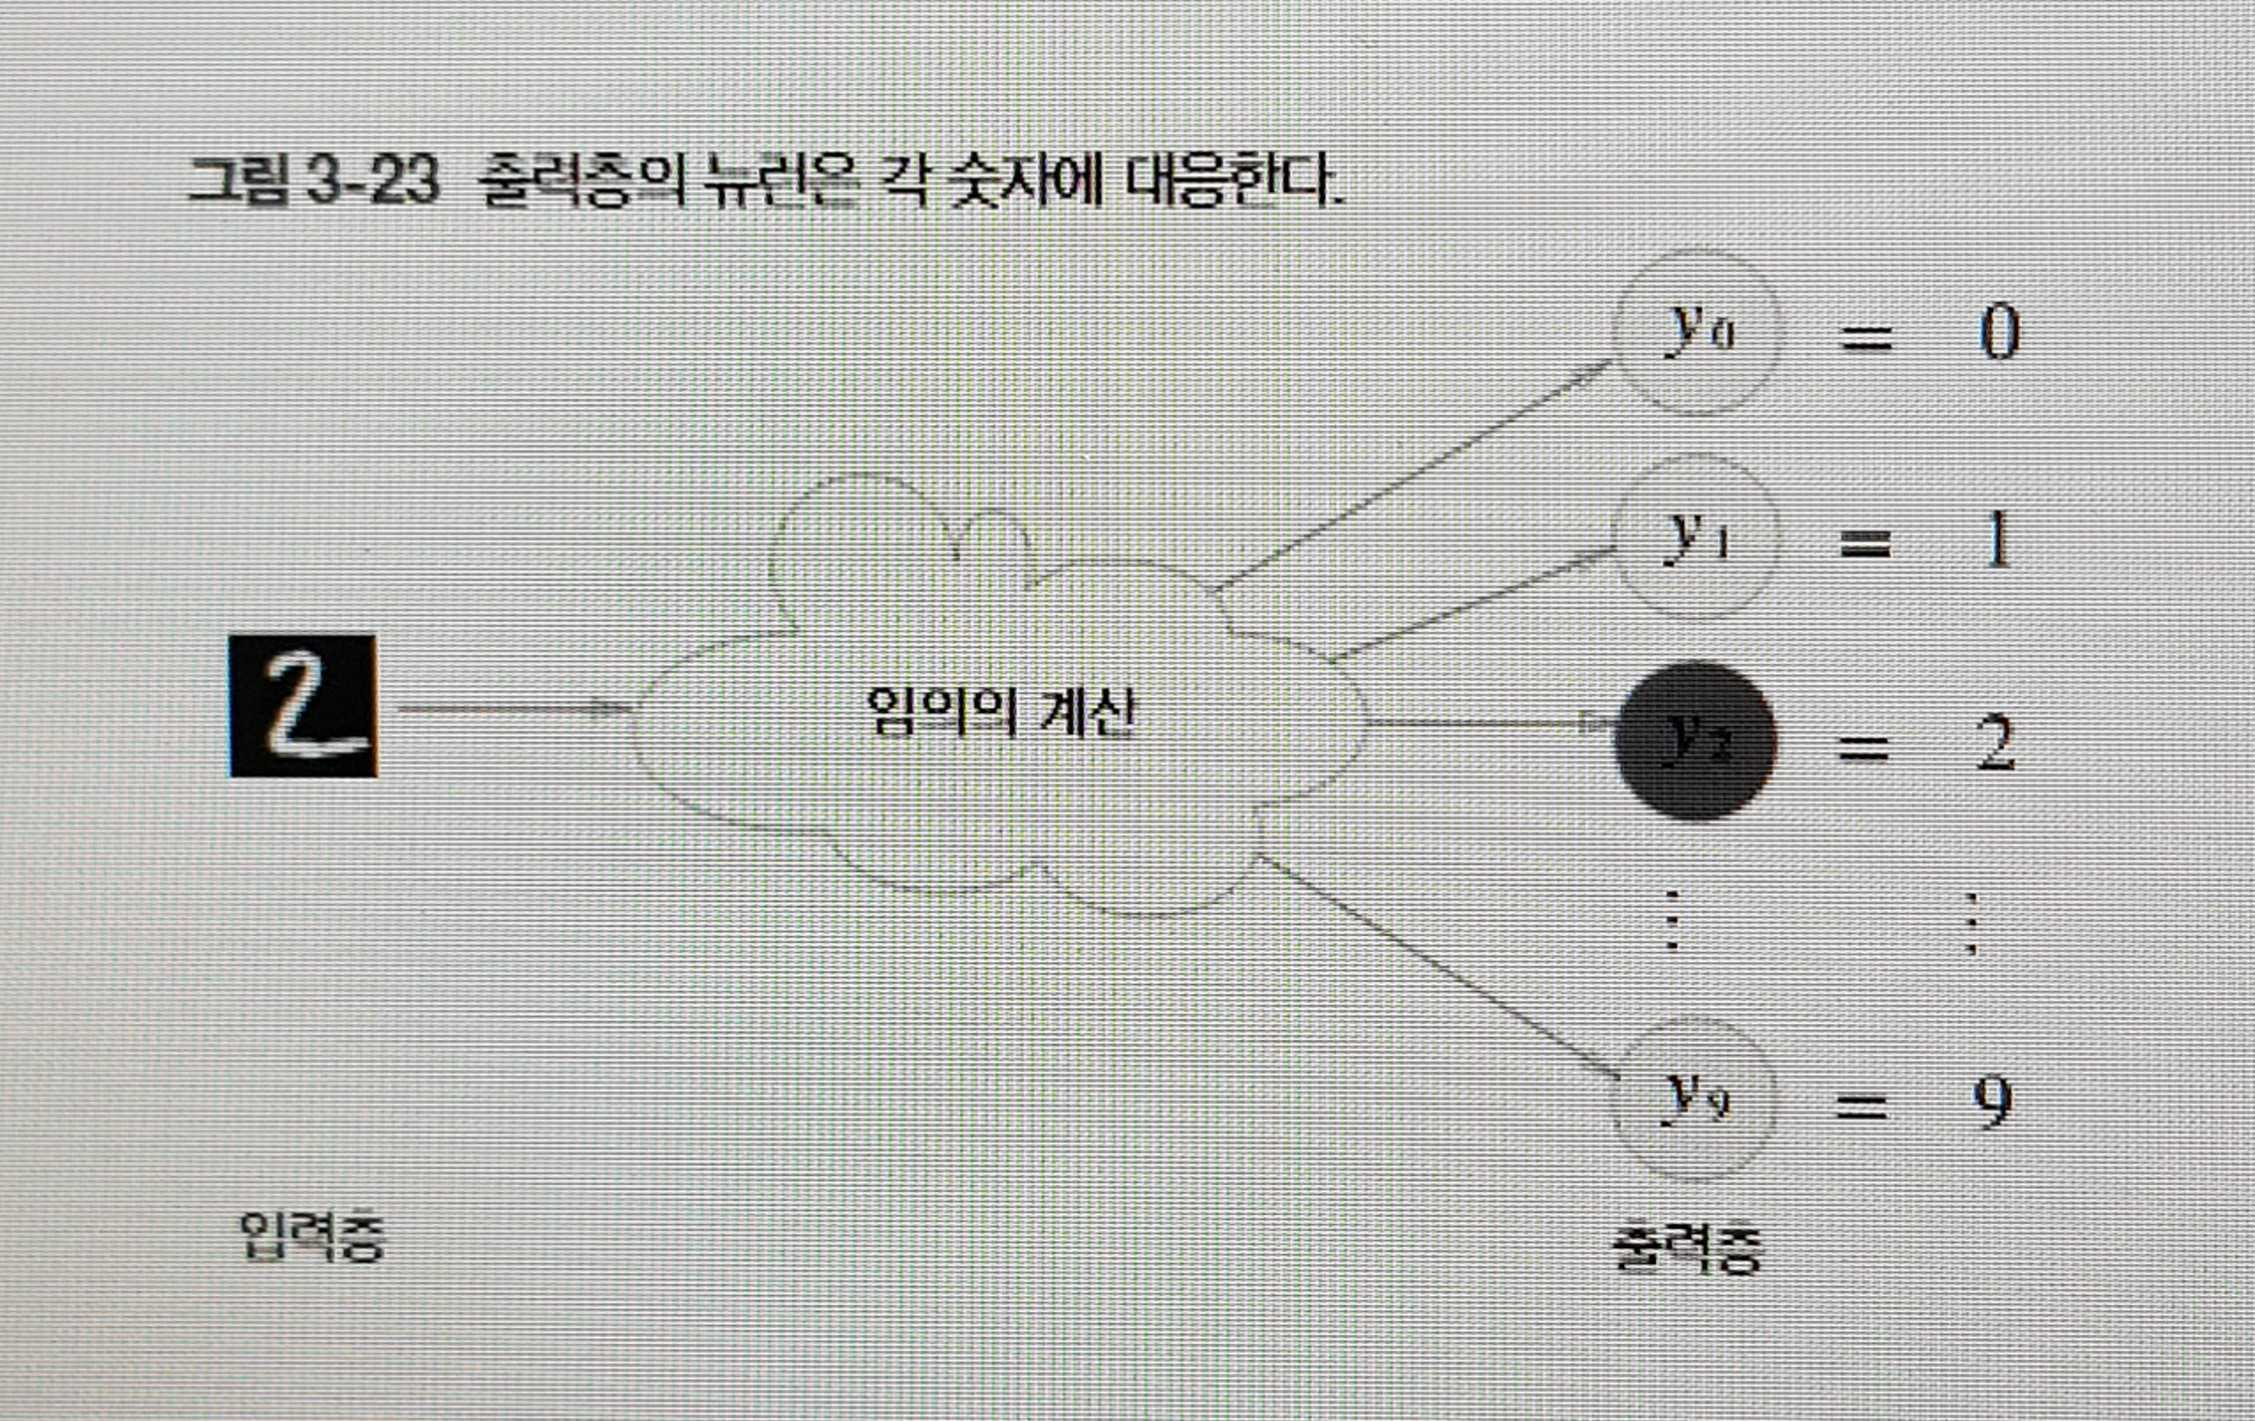

In [100]:
print("분류해야할 클래스가 10개면 출력층도 10개로 설정함")
fig("fig 3-23", img_type = ".jpg", w = 500)

## 손글씨 숫자 인식

### MNIST 데이터셋(,손글씨 숫자 이미지 집합)

손글씨 이미지 데이터셋
28 * 28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취함
또한 이미지에는 그 이미지가 어떤 숫자를 의미하는지 레이블이 붙어있음


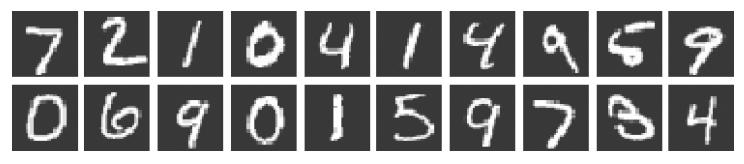

In [101]:
print("손글씨 이미지 데이터셋\n"
     "28 * 28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취함\n"
     "또한 이미지에는 그 이미지가 어떤 숫자를 의미하는지 레이블이 붙어있음")
fig("fig 3-24", w = 500)

In [102]:
# !pip install python-mnist
!pip install pillow

In [103]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from other.dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False) #flatten = 배열의 평탄화, normalize = 픽셀 값을 0~255로 할 것인지(False) 0~1로 정규화 할 것인지(True),
#one_hot_label = 레이블을 원핫인코딩으로 표현할 것인지(True), 실제 레이블로 표현할 것인지(False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형 -> flatten = True로 되어있으면 1차원 array로 저장함. shape가 [n, ]이라는 말. 그래서 변형해주는 것임
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [104]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [105]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [106]:
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

mnist 이미지 예


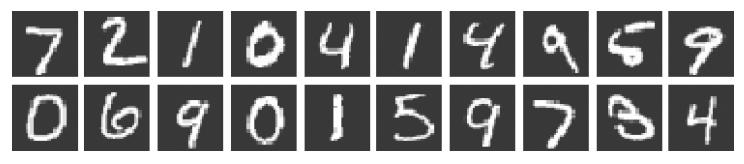

In [107]:
print("mnist 이미지 예")
fig("fig 3-24", w = 500)

### 신경망의 추론 처리

In [111]:
print("입력층 뉴런은 784개 (28 * 28 = 784)")
print("출력층 뉴런은 10개 (0 ~ 9 갯수)")
print("은닉층은 총 2개이며, 1차 은닉층에는 50개의 뉴런, 2차 은닉층에는 100개의 뉴런 배치(임의로 정함)")


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)#flatten = 배열의 평탄화(1차원), normalize = 픽셀 값을 0~255로 할 것인지(False) 0~1로 정규화 할 것인지(True),
#one_hot_label = 레이블을 원핫인코딩으로 표현할 것인지(True), 실제 레이블로 표현할 것인지(False)
    return x_test, t_test
# 학습된 가중치 매개변수를 읽는 과정. 가중치와 편향 매개변수가 dict로 저장되어 있음    
def init_network():
    with open("D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic/other/ch03/sample_weight.pkl", "rb") as f: #windows
#     with open("/Volumes/GoogleDrive/내 드라이브/local_notebook/deep_learning_from_the_basic/other/ch03/sample_weight.pkl", "rb") as f: #mac
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

입력층 뉴런은 784개 (28 * 28 = 784)
출력층 뉴런은 10개 (0 ~ 9 갯수)
은닉층은 총 2개이며, 1차 은닉층에는 50개의 뉴런, 2차 은닉층에는 100개의 뉴런 배치(임의로 정함)


In [112]:
print(os.getcwd())

D:\공유 드라이브\Predictive Marketing\Team\개인\항민\deep_learning_from_the_basic


In [113]:
x, t = get_data() # mnist 데이터셋에서 데이터 가져옴
network = init_network() #pickle에 있는 dict 가져옴

accuracy_cnt = 0 #시작은 0
for i in range(len(x)): # for문을 0 <= i <= 9999 까지 돌리는데,
    y = predict(network, x[i]) # 1장씩 꺼내서 predict 함수로 분류한다. 이 때 [0.1, 0.05, 0.5 ... ...] 같은 배열이 반환되고, (아래 셀 참고)
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스(argmax = array내에서 가장 큰 값)를 할당함(인덱스라고 표현은 했지만 이게 바로 예측결과임) e.g. np.argmax(predict(network, x[0]))의 결괏값은 7
    if p == t[i]: # np.argmax(y[i])가 같은 sequence의 t[i]와 같으면 accuracy_cnt에 +1(예측값 == 실젯값)
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [114]:
predict(network, x[0])

array([8.4412488e-05, 2.6350631e-06, 7.1549421e-04, 1.2586262e-03,
       1.1727954e-06, 4.4990808e-05, 1.6269318e-08, 9.9706501e-01,
       9.3744793e-06, 8.1831159e-04], dtype=float32)

In [115]:
test = []

for i in range(len(x)): # for문을 0 <= i <= 9999 까지 돌리는데,
    y = predict(network, x[i]) # 1장씩 꺼내서 precit 함수로 분류한다. 이 때 [0.1, 0.05, 0.5 ... ...] 같은 배열이 반환되고, 
    test.append(np.argmax(y)) # 확률이 가장 높은 원소의 인덱스(argmax = array내에서 가장 큰 값)를 할당함(인덱스라고 표현은 했지만 이게 바로 예측결과임) e.g. np.argmax(predict(network, x[0]))의 결괏값은 7

In [116]:
testdf = pd.DataFrame(test, columns = ["pred"])
testdf

,pred
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [117]:
testdf["actual"] = t
testdf

,pred,actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [118]:
print(len(testdf[testdf.pred == testdf.actual]))
print(len(testdf)-len(testdf[testdf.pred == testdf.actual]))
print(len(testdf[testdf.pred == testdf.actual])+(len(testdf)-len(testdf[testdf.pred == testdf.actual])))

9352
648
10000


In [119]:
print("예제에서는 단순히 0~255 픽셀을 255로 나눠서 0~1로 정규화했는데, 실제 사례에서는 데이터 분포를 고려해서 다양한 스케일링 방법을 적용함\n"
     "저자는 데이터를 균일하게 분포시키는 백색화(whitening)에 대한 내용도 기술함")

예제에서는 단순히 0~255 픽셀을 255로 나눠서 0~1로 정규화했는데, 실제 사례에서는 데이터 분포를 고려해서 다양한 스케일링 방법을 적용함
저자는 데이터를 균일하게 분포시키는 백색화(whitening)에 대한 내용도 기술함


### 배치 처리

In [120]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']
print("x.shape: " + str(x.shape))
print("x[0].shape: " +str(x[0].shape))
print("W1.shape: " + str(W1.shape))
print("W2.shape: " + str(W2.shape))
print("W3.shape: " + str(W3.shape) + "\n")
print("입력데이터와 가중치 매개변수의 형상이 잘 대응된다.(x = n행, 784열, W1 = 784행, 50열, W2 = 50행, 100열, W3 = 100행, 10열")

x.shape: (10000, 784)
x[0].shape: (784,)
W1.shape: (784, 50)
W2.shape: (50, 100)
W3.shape: (100, 10)

입력데이터와 가중치 매개변수의 형상이 잘 대응된다.(x = n행, 784열, W1 = 784행, 50열, W2 = 50행, 100열, W3 = 100행, 10열


위 예시와 아래 이미지는 1개의 이미지를 input했을 때의 형상이다.


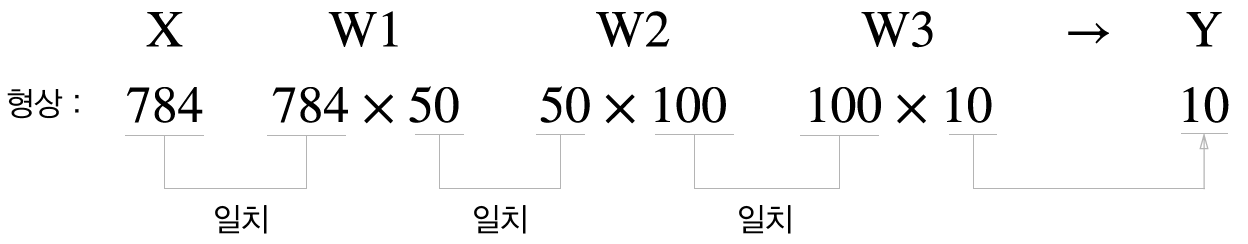

In [121]:
print("위 예시와 아래 이미지는 1개의 이미지를 input했을 때의 형상이다.")
fig("fig 3-26", w = 500)

이미지 여러 장(여기서는 100장)을 한꺼번에 입력하는 경우에는
x의 형상을 100*784의 형상으로 바꾸어서 한 번에 input하는 것으로 이해하면 된다.
이렇게 여러 데이터를 지폐 뭉치처럼 묶는 것을 배치라고 함
1) 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 최적화되어 있음
2) 데이터 하나 하나에 대한 연산을 하지 않기 때문에 병목현상 방지


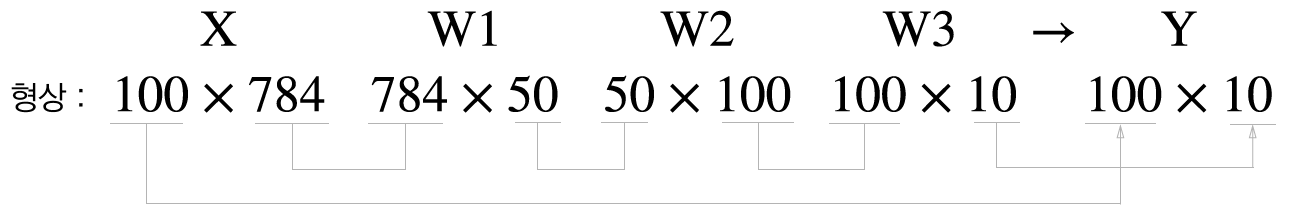

In [124]:
print("이미지 여러 장(여기서는 100장)을 한꺼번에 입력하는 경우에는\n"
     "x의 형상을 100*784의 형상으로 바꾸어서 한 번에 input하는 것으로 이해하면 된다.\n"
     "이렇게 여러 데이터를 지폐 뭉치처럼 묶는 것을 배치라고 함\n"
     "1) 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 최적화되어 있음\n"
     "2) 데이터 하나 하나에 대한 연산을 하지 않기 때문에 병목현상 방지")
fig("fig 3-27", w = 500)

In [187]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # start 0부터 batch_size 100단위로 끊어서 할당 e.g. x[0:100], x[100:200] 결괏값은 아래 실행결과 참고
    y_batch = predict(network, x_batch) # (100행 * 784열)형태의 array를 한 번에 predict해서 100행 10열 출력
    p = np.argmax(y_batch, axis = 1) # y_batch 행별 결괏값에서 argmax()로 최댓값의 index할당(단, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # 실젯값(레이블)과 예측값이 같은 경우 해당 갯수만큼 acc_cnt에 더해줌
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x) ))

Accuracy:0.9352


In [188]:
pd.DataFrame(y_batch)

,0,1,2,3,4,5,6,7,8,9
0,3.894094e-08,8.854895e-06,6.995346e-06,3.660665e-06,8.433738e-07,2.540809e-05,2.547597e-06,1.085061e-08,1.412088e-03,3.627949e-07
1,2.986767e-08,6.638793e-08,9.142778e-08,6.905890e-07,4.695325e-04,1.048432e-05,3.571583e-07,1.156735e-06,3.001094e-05,5.028639e-04
2,5.506405e-03,2.294298e-09,3.952498e-06,1.799750e-06,8.365006e-08,1.946549e-04,4.490154e-07,1.152424e-05,2.611865e-07,6.289089e-07
3,1.077033e-10,2.355597e-03,1.086015e-05,4.160970e-06,2.636065e-06,1.750589e-06,3.216441e-07,7.498629e-06,2.370229e-05,8.251729e-07
4,2.063503e-05,1.183549e-07,2.201919e-04,9.405756e-06,2.953130e-07,7.296039e-06,1.147544e-06,1.667773e-06,1.108239e-06,3.845325e-08
...,...,...,...,...,...,...,...,...,...,...
95,9.284520e-07,4.310299e-06,2.780957e-02,2.387060e-04,1.128119e-09,6.952160e-07,1.932114e-07,2.050021e-06,1.912008e-05,6.166030e-09
96,2.901774e-06,1.166599e-06,7.863785e-05,1.279359e-02,1.020003e-09,9.894284e-06,1.616274e-08,4.590246e-06,3.766256e-06,2.518964e-07
97,1.975916e-09,2.855676e-07,2.962639e-07,1.771218e-07,3.930609e-03,2.898029e-06,1.182413e-06,3.048862e-06,2.412714e-05,8.943238e-05
98,9.575999e-07,1.177178e-06,1.916963e-07,9.847474e-07,1.943208e-06,1.391802e-03,4.202685e-06,5.847690e-08,1.322122e-04,1.379306e-07


In [189]:
pd.DataFrame(np.argmax(y_batch, axis = 1))

,0
0,8
1,9
2,0
3,1
4,2
...,...
95,2
96,3
97,4
98,5


In [190]:
pd.DataFrame(x[0:100])
#이걸 predict하고 이후 argmax

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 정리

이번 장에서는 신경망의 순전파를 살펴봄

각 층의 뉴런들이 다른 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 개념은 동일하나,

다음 뉴런으로 넘어갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있었음.

신경망에서 시그모이드 함수를, 퍼셉트론에서는 계단 함수를 그 예로 들 수 있음.

이 차이에 대한 내용은 다음 장에서 계속~